In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [13]:
if 'Cabin' in train_df.columns:
    train_df = train_df.drop("Cabin", axis=1)
if 'Cabin' in test_df.columns:
    test_df = test_df.drop("Cabin", axis=1)

In [14]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
if test_df['Embarked'].isnull().sum() > 0:
    test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

In [15]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df["Survived"]

In [11]:
train_df = train_df.drop("Cabin", axis=1)
test_df = test_df.drop("Cabin", axis=1)

In [16]:
numeric_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

In [17]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [18]:
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [19]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)

Training Data Shape: (712, 7)
Validation Data Shape: (179, 7)


In [20]:
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [21]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:

pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pclass', 'Age', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [23]:
y_pred_lr = pipe_lr.predict(X_val)
y_pred_rf = pipe_rf.predict(X_val)
y_pred_gb = pipe_gb.predict(X_val)

In [24]:
acc_lr = accuracy_score(y_val, y_pred_lr)
acc_rf = accuracy_score(y_val, y_pred_rf)
acc_gb = accuracy_score(y_val, y_pred_gb)

In [25]:
print("Logistic Regression Report:")
print(classification_report(y_val, y_pred_lr))
print("Random Forest Report:")
print(classification_report(y_val, y_pred_rf))
print("Gradient Boosting Report:")
print(classification_report(y_val, y_pred_gb))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Gradient Boosting Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       17

In [26]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [acc_lr, acc_rf, acc_gb]
})
print("\nComparison of Model Accuracies:")
print(results)



Comparison of Model Accuracies:
                 Model  Accuracy
0  Logistic Regression  0.810056
1        Random Forest  0.804469
2    Gradient Boosting  0.821229


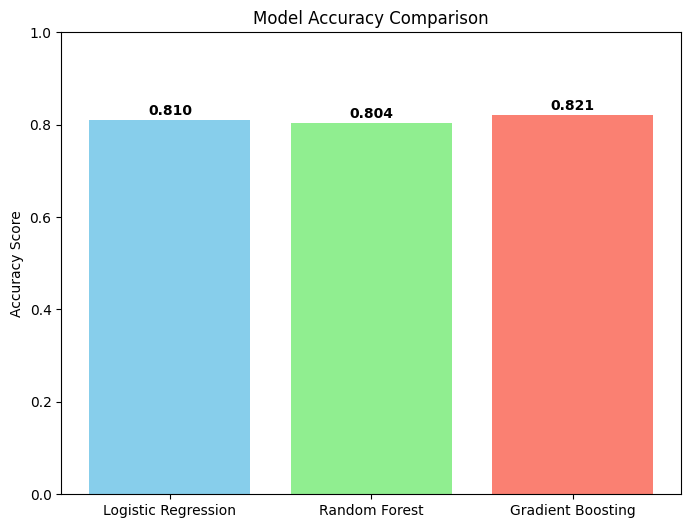

In [27]:
plt.figure(figsize=(8, 6))
bars = plt.bar(results['Model'], results['Accuracy'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.3f}", ha='center', fontweight='bold')
plt.show()

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

In [39]:

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)


In [40]:
pipe_stack = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', stack_model)
])


In [41]:
param_grid = {
    'classifier__rf__n_estimators': [50, 100],
    'classifier__gb__learning_rate': [0.05, 0.1],
    'classifier__xgb__n_estimators': [50, 100],
    'classifier__lgbm__n_estimators': [50, 100],
    'classifier__final_estimator__C': [0.1, 1, 10]
}

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
grid = GridSearchCV(pipe_stack, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid.best_score_))


Best Parameters: {'classifier__final_estimator__C': 10, 'classifier__gb__learning_rate': 0.05, 'classifier__lgbm__n_estimators': 100, 'classifier__rf__n_estimators': 50, 'classifier__xgb__n_estimators': 50}
Best Cross-Validation Accuracy: 0.8385


In [43]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print("\nValidation Accuracy: {:.4f}".format(acc))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


Validation Accuracy: 0.8380

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [45]:
!pip freeze > requirement.txt